#  Lab 4 - Cleaning and EDA of IMDB

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Movies </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Objectives

About 10000 "best movies" were fetched and parsed from IMDB. 

`imdb_top_10000.txt` contain data tabular format as a CSV file. In this lab we'll clean and further parse the data. We'll then do some exploratory data analysis to answer questions about these best books and popular genres.

By the end of this lab, you should be able to:

1. Load and systematically address missing values, ancoded as NaN values in our data set, for example, by removing observations associated with these values.

2. Parse columns in the dataframe to create new dataframe columns.
3. Create and interpret visualizations to explore the data set


### Basic EDA workflow


The basic workflow is as follows:

1. **Scrape**  data using beautiful soup and python request.
2. **Build** a DataFrame from the data (ideally, put all data in this object)
3. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
4. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
5. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## 1. Loading and Cleaning with Pandas
Read in the `imdb_top_10000.txt` file, examine the data, and do any necessary data cleaning.
The textfile is tab-separated, and doesn't have any column headers. We set the appropriate keywords in `pd.read_csv` to handle this

Here is a description of the columns (in order) present in this csv file:

```
imdbID: identifier for the IMDB
title: title of the movie
year: the year the movie was released.
score: Rating of the movie in the scale of 1 - 10
votes: Number of votes received for the movie
runtime: Duration of the movie in min
genres: Genre of the movie seperated by '|'
```

In [2]:
import pandas as pd
df = pd.read_csv("/content/imdb_top_10000.txt", sep='/t')

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [3]:
df.head()

tt0111161\tThe Shawshank Redemption (1994)\t1994\t 9.2\t619479\t142 mins.\tCrime|Drama
0  tt0110912\tPulp Fiction (1994)\t1994\t 9.0\t49...                                    
1  tt0137523\tFight Club (1999)\t1999\t 8.8\t4581...                                    
2  tt0133093\tThe Matrix (1999)\t1999\t 8.7\t4481...                                    
3  tt1375666\tInception (2010)\t2010\t 8.9\t38514...                                    
4  tt0109830\tForrest Gump (1994)\t1994\t 8.7\t36...

In [4]:
df = pd.read_csv("/content/imdb_top_10000.txt", sep = "\t", names=['imdbID', 'title', 'year', 'score', 'votes', 'runtime', 'genres'])
df.head()

imdbID                            title  year  score   votes    runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479  142 mins.   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065  154 mins.   
2  tt0137523                Fight Club (1999)  1999    8.8  458173  139 mins.   
3  tt0133093                The Matrix (1999)  1999    8.7  448114  136 mins.   
4  tt1375666                 Inception (2010)  2010    8.9  385149  148 mins.   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [5]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

In [6]:
df.isna().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     1
dtype: int64

In [7]:
df.shape

(10000, 7)

In [8]:
df.dropna(subset= ['genres'], inplace = True)
df.isna().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     0
dtype: int64

In [9]:
df.shape

(9999, 7)

## 2. Asking Questions

Which movies has a highest votes?

## 3. Parsing and Completing the DataFrame

There are several problems with the DataFrame at this point:

- The runtime column describes a number, but is stored as a string
- The genres column is not atomic -- it aggregates several genres together. This makes it hard, for example, to extract which movies are Comedies.
- The movie year is repeated in the title and year column

In [10]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

In [11]:
runtime = [int(runtime.split(" ")[0]) for runtime in df.runtime]
df['runtime'] = runtime
df.head()

imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [12]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime      int64
genres      object
dtype: object

In [13]:
set_genre = set()

In [14]:
for genres in df.genres:
  set_genre.update(genres.split('|'))
len(set_genre)

24

In [15]:
for genres in set_genre:
  df[genres] = [genres in row.split("|") for row in df.genres]

In [16]:
genre = df[list(set_genre)]
genre.head()

Sport  Drama  Action  Romance  Film-Noir  Musical  Reality-TV  Horror  \
0  False   True   False    False      False    False       False   False   
1  False  False   False    False      False    False       False   False   
2  False   True   False    False      False    False       False   False   
3  False  False    True    False      False    False       False   False   
4  False  False    True    False      False    False       False   False   

   Animation  Family  ...  Biography  Comedy  Adventure  Thriller  Mystery  \
0      False   False  ...      False   False      False     False    False   
1      False   False  ...      False   False      False      True    False   
2      False   False  ...      False   False      False      True     True   
3      False   False  ...      False   False       True     False    False   
4      False   False  ...      False   False       True      True    False   

    News    War  Western  Adult  History  
0  False  False    False  False    False  
1  False  False    False  False    False  
2  False  False    False  False    False  
3  False  False    False  False    False  
4  False  False    False  False    False  

[5 rows x 24 columns]

In [17]:
df['title'] = [t[0:-7] for t in df.title]
df.head()

imdbID                     title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction  1994    9.0  490065      154   
2  tt0137523                Fight Club  1999    8.8  458173      139   
3  tt0133093                The Matrix  1999    8.7  448114      136   
4  tt1375666                 Inception  2010    8.9  385149      148   

                             genres  Sport  Drama  Action  ...  Biography  \
0                       Crime|Drama  False   True   False  ...      False   
1                    Crime|Thriller  False  False   False  ...      False   
2            Drama|Mystery|Thriller  False   True   False  ...      False   
3           Action|Adventure|Sci-Fi  False  False    True  ...      False   
4  Action|Adventure|Sci-Fi|Thriller  False  False    True  ...      False   

   Comedy  Adventure  Thriller  Mystery   News    War  Western  Adult  History  
0   False      False     False    False  False  False    False  False    False  
1   False      False      True    False  False  False    False  False    False  
2   False      False      True     True  False  False    False  False    False  
3   False       True     False    False  False  False    False  False    False  
4   False       True      True    False  False  False    False  False    False  

[5 rows x 31 columns]

## 4. EDA

In [19]:
 #Checking max and min in runtime
new_df = df[['runtime', 'title']]
run_time = new_df['runtime']
print("Maximum runtime")
print(run_time.max())
print("Minimum runtime")
print(run_time.min())

Maximum runtime
450
Minimum runtime
0


In [20]:
new_df = df[['title', 'runtime']]
result = new_df[(new_df['runtime'] >= 100)]
result.head()


title  runtime
0  The Shawshank Redemption      142
1              Pulp Fiction      154
2                Fight Club      139
3                The Matrix      136
4                 Inception      148

## 5. Determining Best Movies

In [21]:
title = df.groupby('title')
title.head(5)
title['score'].max()


title
'Crocodile' Dundee            6.5
'Round Midnight               7.2
'Tamara Drewe'                6.3
'Til There Was You            4.4
(500) Days of Summer          8.0
                             ... 
\xc7a commence aujourd'hui    7.4
eXistenZ                      6.8
w Delta z                     5.8
xXx                           5.6
xXx: State of the Union       4.1
Name: score, Length: 9738, dtype: float64

In [22]:
df[df.score == df.score.max()][['title', 'year', 'score', 'votes', 'genres', 'runtime']]

title  year  score   votes       genres  runtime
0   The Shawshank Redemption  1994    9.2  619479  Crime|Drama      142
26             The Godfather  1972    9.2  474189  Crime|Drama      175

## 6. Trends in Popularity of Genres

In [26]:
genredf = df[list(set_genre)]
genredf.head()

Sport  Drama  Action  Romance  Film-Noir  Musical  Reality-TV  Horror  \
0  False   True   False    False      False    False       False   False   
1  False  False   False    False      False    False       False   False   
2  False   True   False    False      False    False       False   False   
3  False  False    True    False      False    False       False   False   
4  False  False    True    False      False    False       False   False   

   Animation  Family  ...  Biography  Comedy  Adventure  Thriller  Mystery  \
0      False   False  ...      False   False      False     False    False   
1      False   False  ...      False   False      False      True    False   
2      False   False  ...      False   False      False      True     True   
3      False   False  ...      False   False       True     False    False   
4      False   False  ...      False   False       True      True    False   

    News    War  Western  Adult  History  
0  False  False    False  False    False  
1  False  False    False  False    False  
2  False  False    False  False    False  
3  False  False    False  False    False  
4  False  False    False  False    False  

[5 rows x 24 columns]

In [27]:
genre_result = genredf.sum()
y = genre_result.sort_values(ascending=False)[:10]
x = y.index

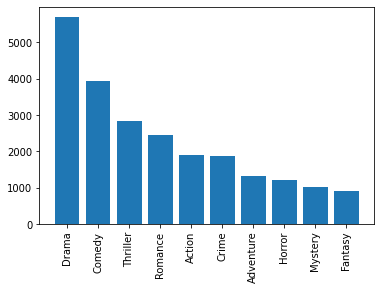

In [29]:
import matplotlib.pyplot as plt
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()